In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 


## 3b.Extracting dataset

In [5]:
placement=pd.read_csv("Placement_pred_DS.csv")


## 3c. Examining the dataset

In [6]:
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,specialisation,PG_per,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,DS,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,CT,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,CT,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,DS,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,CT,55.50,Placed,425000.0


**Inference**
* We have **Gender and Educational qualification** data
* We have all the **educational performance(score)** data
* We have the **status** of placement and salary details
* We can expect **null values in salary** as candidates who weren't placed would have no salary
* **Status** of placement is our target variable rest of them are independent variable except salary

In [7]:
placement_copy.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'specialisation', 'PG_per', 'status',
       'salary'],
      dtype='object')

In [8]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  specialisation  215 non-null    object 
 11  PG_per          215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB
None


We have **215 candidate details** and there are mixed datatypes in each column. We have few missing values in the salary column as expected since those are the people who didn't get hired

In [9]:
#Looking at the datatypes of each factor
placement_copy.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
specialisation     object
PG_per            float64
status             object
salary            float64
dtype: object

We have **1 integer,5 float and 8 object** datatypes in our dataset

In [8]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


**Inference**
* There are **67 null values** in our data, which means 67 unhired candidates. 
* We can't drop these values as this will provide a valuable information on why candidates failed to get hired.
* We can't impute it with mean/median values and it will go against the context of this dataset and it will show unhired candidates got salary.
* Our best way to deal with these null values is to **impute it with '0'** which shows they don't have any income

# 4. Data Cleaning

## 4a. Handling mis_ing values
First lets focus on the missing data in review features,if we drop the rows which has null values we might sabotage some potential information from the dataset. So we have to impute values into the NaN records which leads us to accurate models. Since it is a salary feature,it is best to impute the records with '0' for unhired candidates

In [10]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


Yayy ! we have cleared that Salary **with zero null values**. Now it's time to drop unwanted features !

In [11]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,PG_per,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,DS,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,CT,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,CT,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,DS,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,CT,55.50,Placed,425000.0


We have dropped **serial number** as we have index as default and we have **dropped the boards of school education** as I believe it doesn't matter for recruitment

## 4b. ....... Outliers
Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area. Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. In our case, **let's first visualize our data and decide on what to do with the outliers**

Text(0.5, 1.0, 'UG Degree percentage')

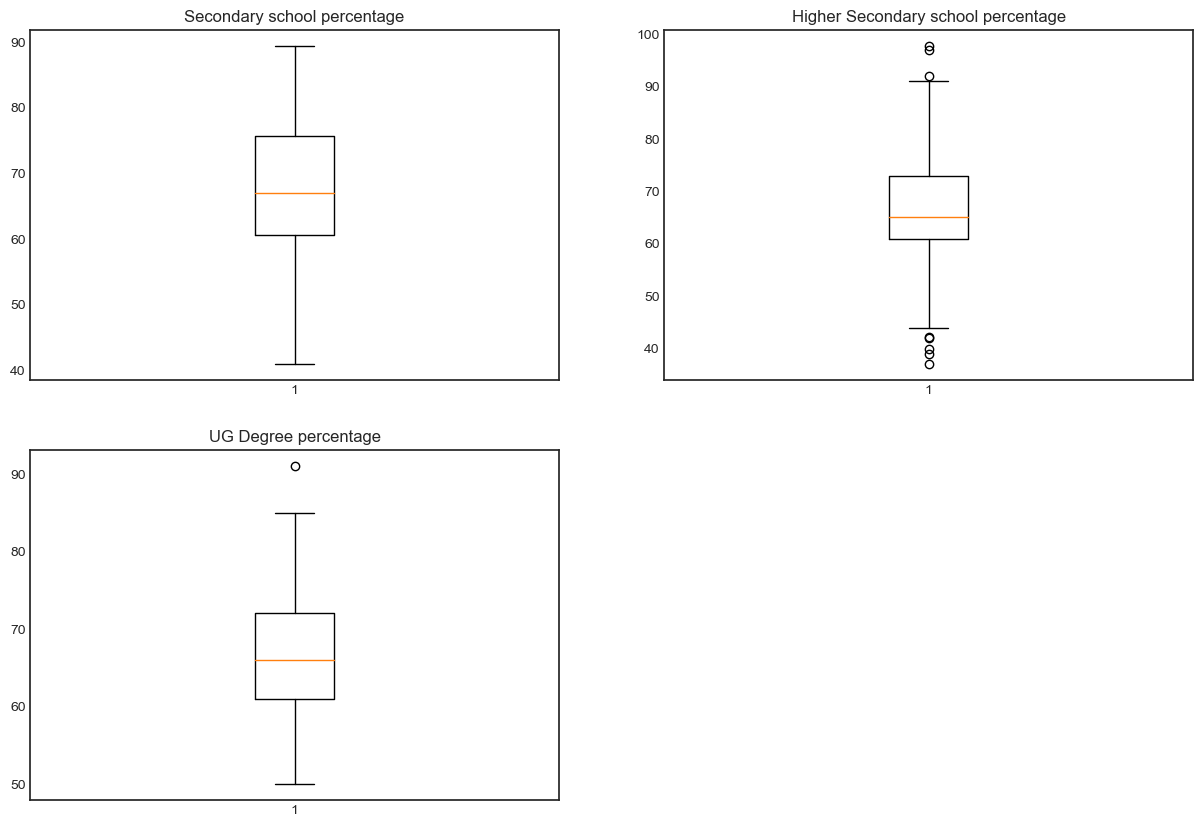

In [14]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')



As you see, we have very less number of outliers in our features. Especially we have majority of the outliers in **hsc percentage** Let's clear em up!

In [15]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

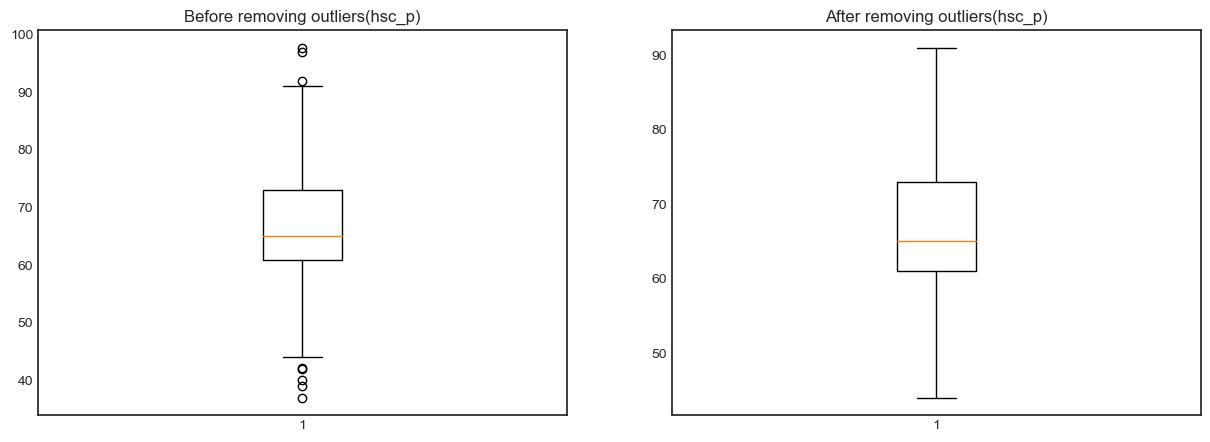

In [16]:
plt.figure(figsize = (15, 5))
plt.style.use('seaborn-white')
ax=plt.subplot(121)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Before removing outliers(hsc_p)')
ax=plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After removing outliers(hsc_p)')

Voalá! We have removed the outliers

# 5.Data Visualizations
## 5a. Count of categorical features- Count plot

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

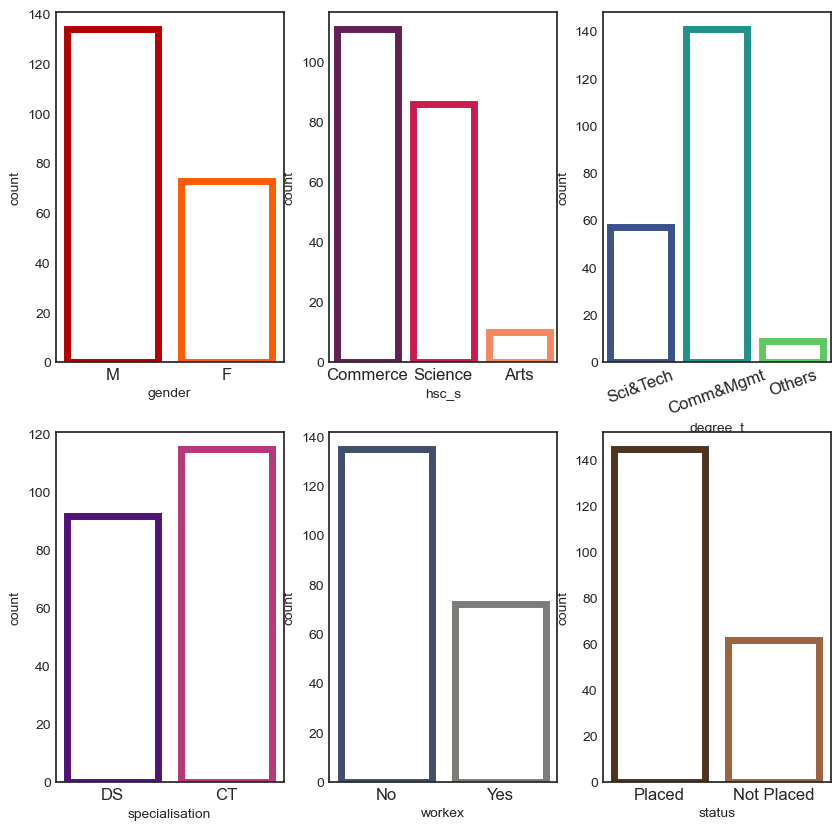

In [17]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

**Inference**
* We have **more male candidates** than female
* We have candidates who did **commerce** as their hsc course and as well as undergrad
* **Science background** candidates are the second highest in both the cases
* Candidates from **Marketing and Finance** dual specialization are high 
* Most of our candidates from our dataset **don't have any work experience**
* Most of our candidates from our dataset **got placed** in a company

## 5b. Distribution Salary- Placed Students

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8844\800116054.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_placed["salary"], ax=ax_hist)


[Text(0.5, 0, '')]

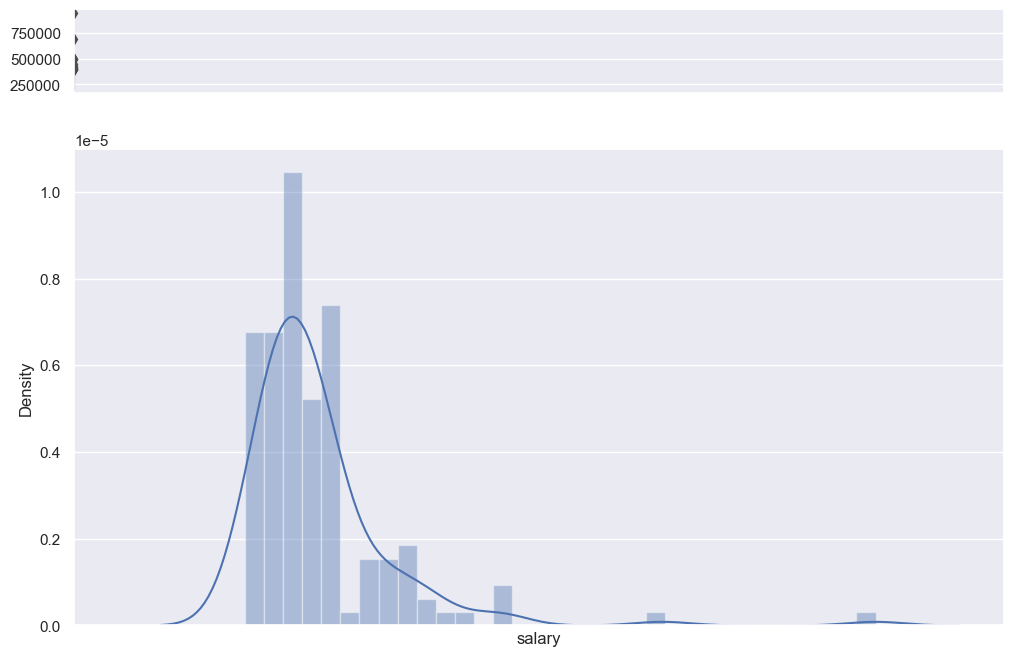

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

**Inference**
* Many candidates who got placed received package between **2L-4L PA**
* Only **one** candidate got around **10L PA**
* The **average** of the salary is a little more than 2LPA


## 5d.Distribution of all percentages

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8844\1226027406.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_filtered['ssc_p'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8844\1226027406.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_filtered['hsc_p'])
C:\Users\LEN

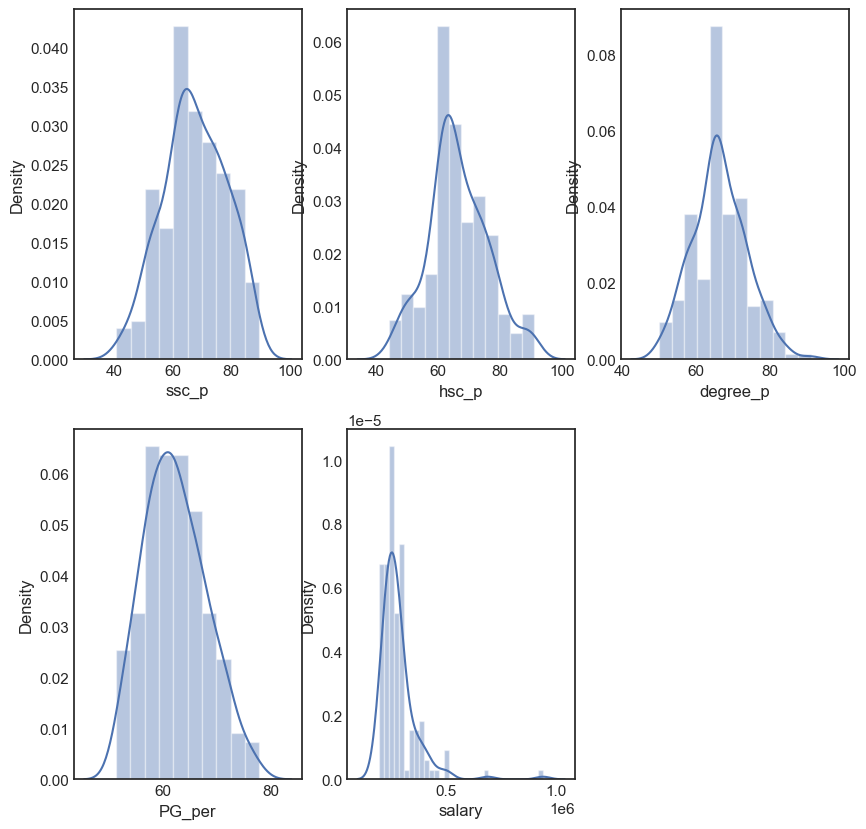

In [20]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(placement_filtered['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(placement_filtered['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(placement_filtered['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(placement_filtered['PG_per'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(placement_placed['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Inference**
* All the distributions follow **normal distribution** except salary feature
* Most of the candidates **educational performances are between 60-80%**
* **Salary distribution got outliers** where few have got salary of 7.5L and 10L PA

## 5e.Work experience Vs Placement Status

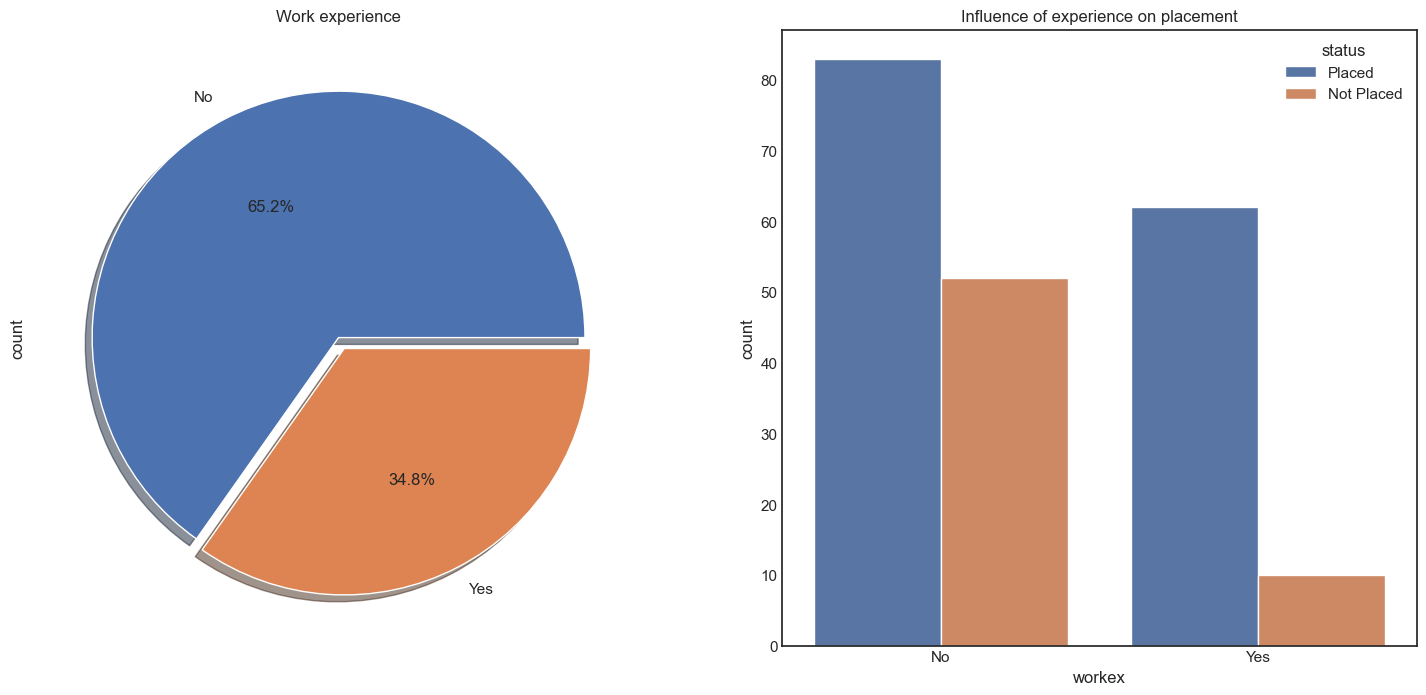

In [21]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

**Inference**
* We have nearly **66.2%** of candidates who never had any work experience
* Candidates who **never had work experience** have **got hired** more than the ones who had experience
* We can conclude that **work experience doesn't influence** a candidate in the recruitment process

## 5f. PG marks vs Placement Status- Does your academic score influence?

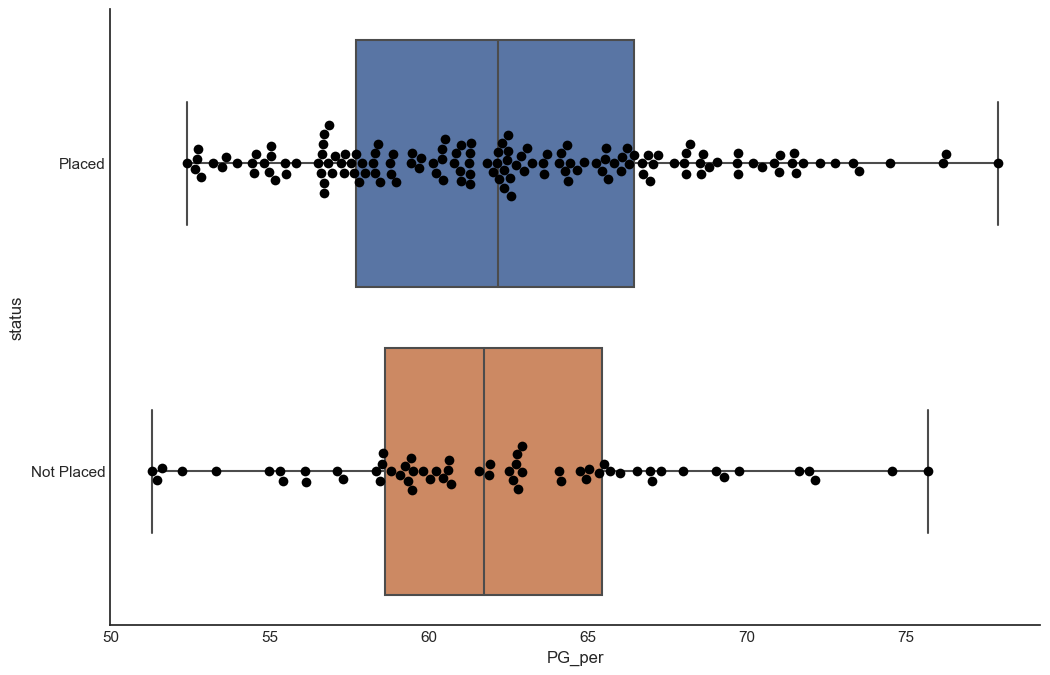

In [22]:
g = sns.boxplot(y = "status",x = 'PG_per',data = placement_filtered, whis=np.inf)
g = sns.swarmplot(y = "status",x = 'PG_per',data = placement_filtered, size = 7,color = 'black')
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

## 5j.Distribution of our data

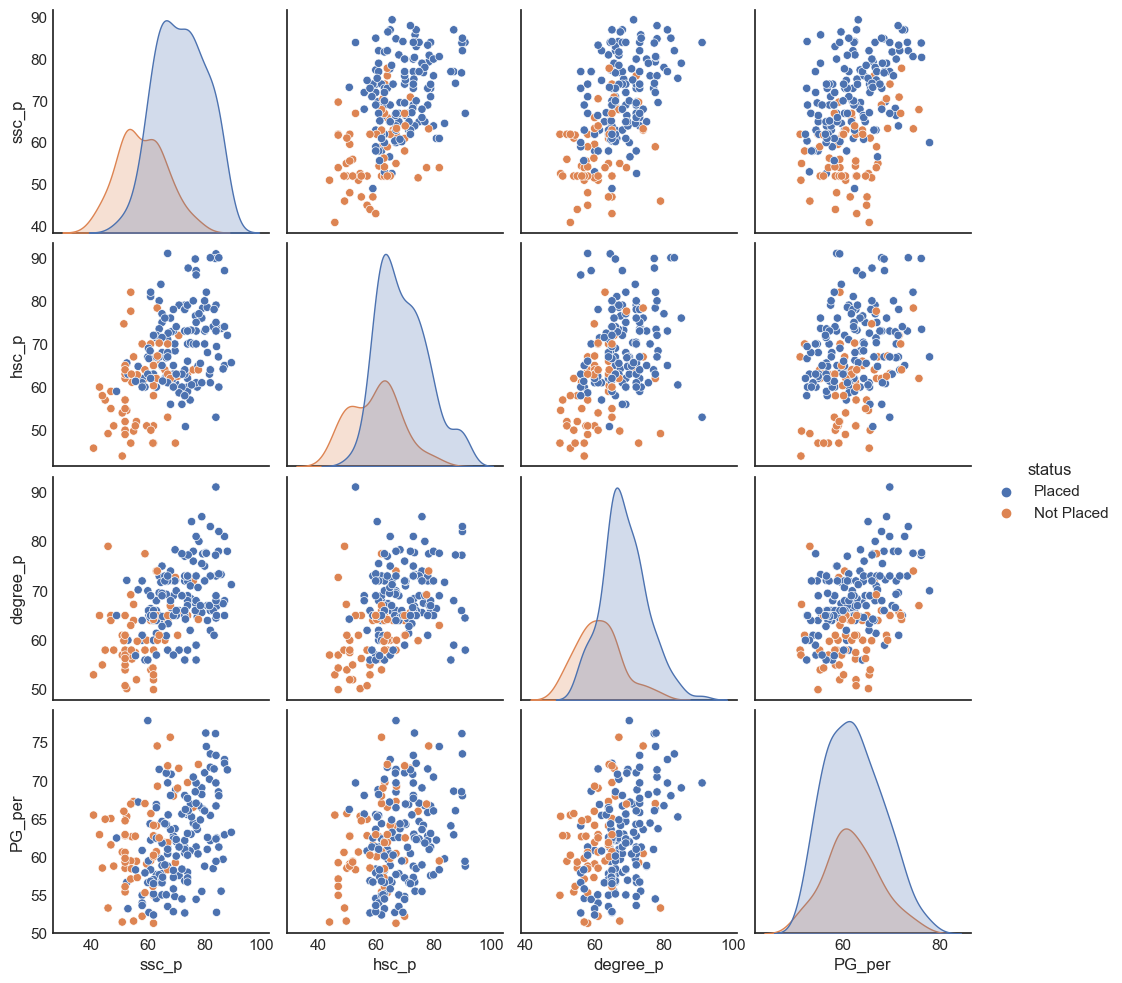

In [23]:
import seaborn as sns
sns.pairplot(placement_filtered,vars=['ssc_p','hsc_p','degree_p','PG_per'],hue="status")

**Inference**
* Candidates who has **high score in higher secondary and undergrad got placed**
* Whomever got **high scores in their schools got placed**
* Comparing the number of students who got placed candidates who got **good PG percentage and employability percentage**  

## 6a. Label Encoding
We have used label encoder function for the category which has only two types of classes

In [24]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,PG_per,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,1,59.43,0,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,0,55.50,1,425000.0


## 6b. One hot encoding
We have used dummies function for the category which has more than two types of classes

In [25]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,specialisation,PG_per,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,1,58.80,1,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,0,66.28,1,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,0,57.80,1,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,1,59.43,0,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,0,55.50,1,False,True,False,True,False,False


In [26]:
feature_cols=['gender','ssc_p','hsc_p','degree_p','workex','specialisation','PG_per',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

13

## 6c. Assigning the target(y) and predictor variable(X)
Our Target is to find whether the candidate is placed or not. We use rest of the features except 'salary' as this won't contribute in prediction(i.e) In real world scenario, students gets salary after they get placed, so we can't use a future feature to predict something which happens in the present

In [27]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status
X

,gender,ssc_p,hsc_p,degree_p,workex,specialisation,PG_per,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,67.00,91.00,58.00,0,1,58.80,False,True,False,False,False,True
1,1,79.33,78.33,77.48,1,0,66.28,False,False,True,False,False,True
2,1,65.00,68.00,64.00,0,0,57.80,True,False,False,True,False,False
3,1,56.00,52.00,52.00,0,1,59.43,False,False,True,False,False,True
4,1,85.80,73.60,73.30,0,0,55.50,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,77.60,0,0,74.49,False,True,False,True,False,False
211,1,58.00,60.00,72.00,0,0,53.62,False,False,True,False,False,True
212,1,67.00,67.00,73.00,1,0,69.72,False,True,False,True,False,False
213,0,74.00,66.00,58.00,0,1,60.23,False,True,False,True,False,False


## 6d. Train and Test Split (80:20)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 13)
Input Test: (42, 13)
Output Training: (165,)
Output Test: (42,)


# 7. Machine Learning models 
Now let's feed the models with our data
**Objective**: To predict whether a student got placed or not

## 7a.Logistic Regression
Let's fit the model in logistic regression and figure out the accuracy of our model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


**83% accurate**. That's really good. Let's check out confusion matrix and see the classification report

### Confusion matrix and Classification report

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 7  8]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.76      0.96      0.85        27

    accuracy                           0.79        42
   macro avg       0.82      0.71      0.73        42
weighted avg       0.80      0.79      0.77        42



**Insights:**
*  The Confusion matrix result is telling us that we have **9+26** correct predictions and **1+6** incorrect predictions.
*  The Classification report reveals that we have **84%** precision which means the accuracy that the model classifier not to label an instance positive that is actually negative and it is important to consider precision value because when you are hiring, you want to **avoid Type I errors at all cost**. They are **culture killers**.In hiring, a false positive is when you THINK an employee is a good fit, but in actuality they’re not.

### ROC Curve
Let's check out the performance of our model through ROC curve

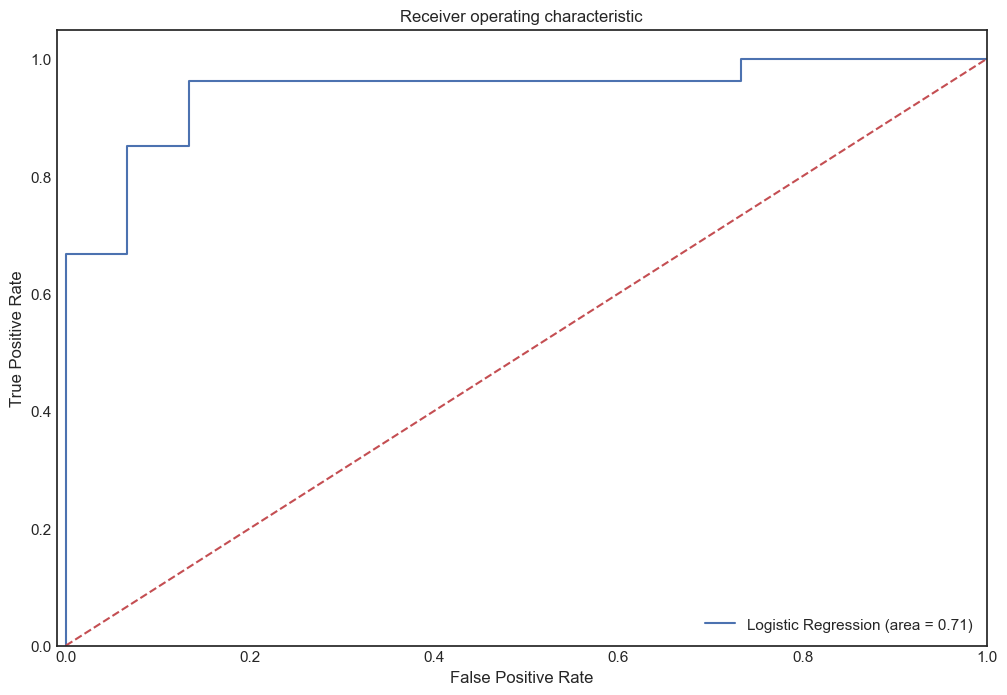

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the placed students correctly rather than predicting false positive. T**he more  the ROC curve(blue) lies towards the top left side the better our model** is. We can choose **0.8 or 0.9** for the threshold value which can reap us true positive results

In [39]:
def predict_status(input_data, model):
    # Ensure input data is in the correct order
    input_values = [input_data[col] for col in feature_cols]
    
    # Convert to 2D array
    input_array = np.array(input_values).reshape(1, -1)
    
    # Predict using the model
    return model.predict(input_array)[0]


In [34]:
input_example = {
    'gender': 1,
    'ssc_p': 70,
    'hsc_p': 65,
    'degree_p':77,
    'workex': 1,
    'specialisation': 0,
    'PG_per': 78,
    'dummy_Arts': 0,
    'dummy_Commerce': 1,
    'dummy_Science': 0,
    'dummy_Comm&Mgmt': 1,
    'dummy_Others': 0,
    'dummy_Sci&Tech': 0
}

prediction = predict_status(input_example, logreg)
print("Predicted Status:", prediction)


Predicted Status: 1


In [35]:
def convert_input(input_data):
    # Gender: Male as 1, Female as 0
    input_data['gender'] = 1 if input_data['gender'].lower() == 'male' else 0

    # Work experience: Yes as 1, No as 0
    input_data['workex'] = 1 if input_data['workex'].lower() == 'yes' else 0

    # MBA Specialisation: Mkt&Fin as 1, Mkt&HR as 0
    input_data['specialisation'] = 1 if input_data['specialisation'] == 'CT' else 0

    # Encoding HSC Stream
    input_data['dummy_Arts'] = 0
    input_data['dummy_Commerce'] = 0
    input_data['dummy_Science'] = 0

    if input_data['hsc_s'].lower() == 'arts':
        input_data['dummy_Arts'] = 1
    elif input_data['hsc_s'].lower() == 'commerce':
        input_data['dummy_Commerce'] = 1
    else:
        input_data['dummy_Science'] = 1

    # Ensure all numerical fields are floats
    for key in ['ssc_p', 'hsc_p', 'degree_p', 'PG_per']:
        input_data[key] = float(input_data[key])
    
    return input_data

def predict_status(raw_input, model):
    # Convert and process the input data
    input_data = convert_input(raw_input.copy())

    # Ensure the processed data is in the correct order for the model
    input_values = [input_data[col] for col in feature_cols]

    # Convert to 2D array
    input_array = np.array(input_values).reshape(1, -1)

    # Predict using the model
    return model.predict(input_array)[0]

input_example = {
    'gender': 'Male',
    'ssc_p': 70,
    'hsc_p': 65,
    'hsc_s': 'Commerce',
    'degree_p': 77,
    'workex': 'Yes',
    'specialisation': 'DS',
    'PG_per': 78,
    'dummy_Arts': 0,
    'dummy_Commerce': 0, 
    'dummy_Science': 0,
    'dummy_Comm&Mgmt': 1,
    'dummy_Others': 0,
    'dummy_Sci&Tech': 0
}


prediction = predict_status(input_example, logreg)
print("Predicted Status:", prediction)


Predicted Status: 1


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate and train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest classifier on test set: {accuracy_rf:.2f}')

Accuracy of Random Forest classifier on test set: 0.83


In [52]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Instantiate and train an XGBClassifier
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgboost_model.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy of XGBoost classifier on test set: {accuracy_xgb:.2f}')


Accuracy of XGBoost classifier on test set: 0.81


In [49]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [53]:
def predict_status(input_data, model):
    # Ensure input data is in the correct order
    input_values = [input_data[col] for col in feature_cols]
    
    # Convert to 2D array
    input_array = np.array(input_values).reshape(1, -1)
    
    # Predict using the model
    return model.predict(input_array)[0]


In [54]:
#for Random Forest
input_example = {
    'gender': 1,
    'ssc_p': 70,
    'hsc_p': 65,
    'degree_p':77,
    'workex': 1,
    'specialisation': 0,
    'PG_per': 78,
    'dummy_Arts': 0,
    'dummy_Commerce': 1,
    'dummy_Science': 0,
    'dummy_Comm&Mgmt': 1,
    'dummy_Others': 0,
    'dummy_Sci&Tech': 0
}

prediction = predict_status(input_example, rf)
print("Predicted Status:", prediction)


Predicted Status: 1


In [55]:
def convert_input(input_data):
    # Gender: Male as 1, Female as 0
    input_data['gender'] = 1 if input_data['gender'].lower() == 'male' else 0

    # Work experience: Yes as 1, No as 0
    input_data['workex'] = 1 if input_data['workex'].lower() == 'yes' else 0

    # MBA Specialisation: Mkt&Fin as 1, Mkt&HR as 0
    input_data['specialisation'] = 1 if input_data['specialisation'] == 'CT' else 0

    # Encoding HSC Stream
    input_data['dummy_Arts'] = 0
    input_data['dummy_Commerce'] = 0
    input_data['dummy_Science'] = 0

    if input_data['hsc_s'].lower() == 'arts':
        input_data['dummy_Arts'] = 1
    elif input_data['hsc_s'].lower() == 'commerce':
        input_data['dummy_Commerce'] = 1
    else:
        input_data['dummy_Science'] = 1

    # Ensure all numerical fields are floats
    for key in ['ssc_p', 'hsc_p', 'degree_p', 'PG_per']:
        input_data[key] = float(input_data[key])
    
    return input_data

def predict_status(raw_input, model):
    # Convert and process the input data
    input_data = convert_input(raw_input.copy())

    # Ensure the processed data is in the correct order for the model
    input_values = [input_data[col] for col in feature_cols]

    # Convert to 2D array
    input_array = np.array(input_values).reshape(1, -1)

    # Predict using the model
    return model.predict(input_array)[0]

input_example = {
    'gender': 'Male',
    'ssc_p': 70,
    'hsc_p': 65,
    'hsc_s': 'Commerce',
    'degree_p': 77,
    'workex': 'Yes',
    'specialisation': 'DS',
    'PG_per': 78,
    'dummy_Arts': 0,
    'dummy_Commerce': 0, 
    'dummy_Science': 0,
    'dummy_Comm&Mgmt': 1,
    'dummy_Others': 0,
    'dummy_Sci&Tech': 0
}


prediction = predict_status(input_example, rf)
print("Predicted Status:", prediction)


Predicted Status: 1


In [58]:
import pickle

# Save the trained model to a file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)